In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

**Завдання 1**

In [29]:
img_list = os.listdir("./assignemnts/dataset")
img_list.sort()
print(img_list)

FileNotFoundError: ignored

In [0]:
def data_augmentation(img):
  height = img.shape[0]
  width = img.shape[1]
  #інверсія яскравості пікселів
  for i in range(height):
    for j in range(width):
      img[i][j]=254-img[i][j]
  #гамма корекція яскравості пікселів
  gamma=0.5
  img=np.power(img,gamma)
  img=(img/np.max(img)*255).astype(np.uint8)
  #згладжування зображення
  img=cv2.GaussianBlur(img, (3,3), 0)
  #перевернути зображення горизонтально
  src = np.float32([[0, 0],[0, height],[width, height],[width,0]])
  dst = np.float32([[0, height],[0, 0],[width,0],[width, height]])
  Mper=cv2.getPerspectiveTransform(src,dst)
  img=cv2.warpPerspective(img,Mper,(width,height))
  #переміщення зображення
  M=np.float32([[1,0,-width*1/4],
               [0,1,height*1/5]])
  img=cv2.warpAffine(img,M,(width, height), borderValue=255)
  #обертання зображення
  M180=cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
  img=cv2.warpAffine(img,M180,(width, height))
  #перекіс зображення
  skew=np.float32([[1,1,1],
                  [0,1,1]])
  img=cv2.warpAffine(img,skew,(width,height))
  return img

In [31]:
for i in img_list:
  img_path=os.path.join(r"./assignemnts/dataset/", i)
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  aug_path=os.path.join(r"./assignemnts/dataset/", "aug"+i)
  cv2.imwrite(aug_path, data_augmentation(img))
  print(aug_path + " saved!")
  

NameError: ignored

**Завдання 2**

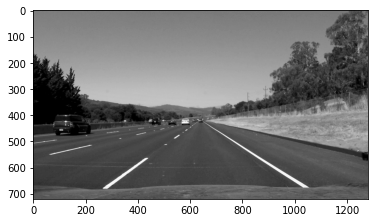

In [32]:
img_path = "assignments/test_img.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500
plt.imshow(img, cmap='gray')

In [0]:
src = np.float32([[590, 450], [695, 450], [1060, 662], [252, 662]]) 
dst = np.float32([[10, 10], [490, 10], [490, 490], [10, 490]])

In [0]:
M = cv2.getPerspectiveTransform(src, dst)

In [0]:
wraped_img = cv2.warpPerspective(img, M, (OUT_IMG_WIDTH, OUT_IMG_HEIGHT))

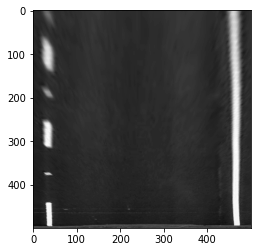

In [36]:
plt.imshow(wraped_img, cmap='gray')
plt.show()